# A simple implementation of an earthquake hazard to be used within CLIMADA

Reads a file with earthquake expicetres (fetch the file from www.isc.ac.uk/iscgem/download.php)
Converts epicentres (Richter magnitude and depth) into modified mercally (MMI) intensity at centroids

Inspired by https://github.com/davidnbresch/climada_module_earthquake_volcano/blob/master/code/eq_isc_gem_read.m etc.

In [1]:
import pandas as pd
isc_gem_cat = pd.read_csv('isc-gem/isc-gem-cat.csv', delimiter=' , ', comment='#', header=None, engine='python')
isc_gem_cat.head()

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,30
0,1904-04-04 10:02:34.56,41.802,23.108,8.6,6.6,164.2,B,15.0,4.8,C,...,,,,,,,,,,610326271
1,1904-04-04 10:26:00.88,41.758,23.249,8.3,6.9,15.2,B,15.0,4.8,C,...,,,,,,,,,,16957813
2,1904-06-25 14:45:39.14,51.424,161.638,33.6,18.7,116.2,C,15.0,25.0,C,...,,,,,,,,,,16957820
3,1904-06-25 21:00:38.72,52.763,160.277,28.6,14.6,43.1,C,30.0,10.3,C,...,,,,,,,,,,16957819
4,1904-12-20 05:44:20.44,8.962,-84.042,26.3,13.2,74.1,C,10.0,14.0,C,...,,,,,,,,,,16957832


In [2]:
# the file's first rows are comment rows, the last of them is the 'header' row (containing the column names),
# hence some parsing is required
with open('isc-gem/isc-gem-cat.csv') as fl:
    for ln in fl.readlines():
        if ln[0] != '#': break
        pr = ln
isc_gem_cat.columns = [x.strip() for x in pr[1:].split(',')]
isc_gem_cat.head()

,date,lat,lon,smajax,sminax,strike,q,depth,unc,q,...,mtp,mtt,str1,dip1,rake1,str2,dip2,rake2,type,eventid
0,1904-04-04 10:02:34.56,41.802,23.108,8.6,6.6,164.2,B,15.0,4.8,C,...,,,,,,,,,,610326271
1,1904-04-04 10:26:00.88,41.758,23.249,8.3,6.9,15.2,B,15.0,4.8,C,...,,,,,,,,,,16957813
2,1904-06-25 14:45:39.14,51.424,161.638,33.6,18.7,116.2,C,15.0,25.0,C,...,,,,,,,,,,16957820
3,1904-06-25 21:00:38.72,52.763,160.277,28.6,14.6,43.1,C,30.0,10.3,C,...,,,,,,,,,,16957819
4,1904-12-20 05:44:20.44,8.962,-84.042,26.3,13.2,74.1,C,10.0,14.0,C,...,,,,,,,,,,16957832


In [4]:
isc_gem_cat.columns

Index(['date', 'lat', 'lon', 'smajax', 'sminax', 'strike', 'q', 'depth', 'unc',
       'q', 'mw', 'unc', 'q', 's', 'mo', 'fac', 'mo_auth', 'mpp', 'mpr', 'mrr',
       'mrt', 'mtp', 'mtt', 'str1', 'dip1', 'rake1', 'str2', 'dip2', 'rake2',
       'type', 'eventid'],
      dtype='object')

<AxesSubplot:title={'center':'ISC GEM epicentres'}, xlabel='lon', ylabel='lat'>

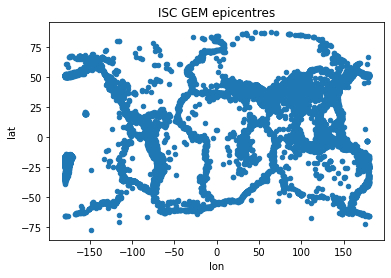

In [3]:
isc_gem_cat.plot.scatter(x='lon',y='lat',title='ISC GEM epicentres')

/Users/dbresch/opt/anaconda3/envs/climada_env/lib/python3.8/site-packages/pyproj/crs/crs.py:1256: UserWarning: You will likely lose important projection information when converting to a PROJ string from another format. See: https://proj.org/faq.html#what-is-the-best-format-for-describing-coordinate-reference-systems
  return self._crs.to_proj4(version=version)


<GeoAxesSubplot:>

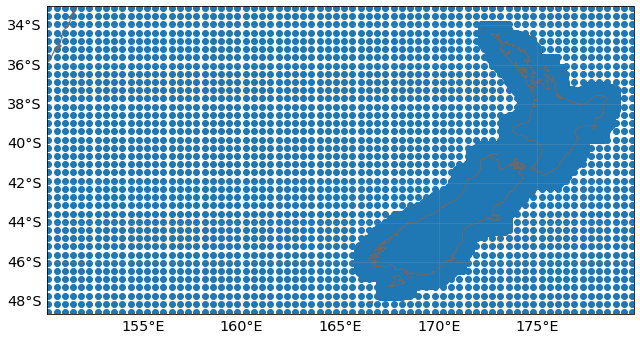

In [10]:
from climada.hazard import Centroids
centroids_NZL=Centroids.from_mat('NZL_NewZealand_centroids.mat')
centroids_NZL.plot()

IndexError: index 1 is out of bounds for axis 0 with size 1